In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
#load handwritten data from keras
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [7]:
len(X_train)

60000

In [8]:
len(y_train)

60000

In [9]:
len(X_test)

10000

In [10]:
len(y_test)

10000

In [13]:
X_train[0].shape

(28, 28)

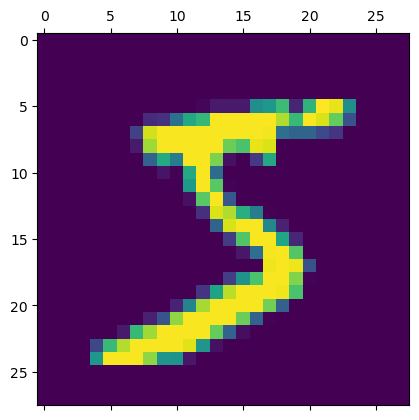

In [32]:
plt.matshow(X_train[0])
X_train=X_train/255
X_test=X_test/255

In [33]:
#flatting the dataset as this is a 2-d dataset od (28,28) now we will convert it into 1-d i.e 784 
x_train_flattend=X_train.reshape(len(X_train),28*28)
x_test_flattend=X_test.reshape(len(X_test),28*28)

In [34]:
x_train_flattend.shape

(60000, 784)

In [35]:
x_test_flattend.shape

(10000, 784)

In [36]:
x_train_flattend[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [60]:
#building a neural network
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='relu')
    
])
model.compile(
optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattend,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3428 - accuracy: 0.1000
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.0987
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.0987
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.0987
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.0987


In [38]:
model.evaluate(x_test_flattend,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2733 - accuracy: 0.9239


[0.27329906821250916, 0.9239000082015991]

In [42]:
y_predicted=model.predict(x_test_flattend)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([3.8136635e-02, 4.1450505e-07, 4.9078256e-02, 9.5913315e-01,
       2.8843046e-03, 9.0916522e-02, 1.5500674e-06, 9.9982399e-01,
       9.1813780e-02, 6.3452607e-01], dtype=float32)

In [43]:
np.argmax(y_predicted[0])

7

In [49]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [50]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    0,    1,    0,    4,    2,    3,    2,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [  12,    9,  916,   16,   12,    3,   13,   12,   36,    3],
       [   5,    1,   19,  915,    0,   31,    2,   15,   15,    7],
       [   2,    2,    2,    1,  927,    0,   11,    4,    8,   25],
       [  12,    3,    3,   23,   11,  785,   12,    9,   27,    7],
       [  14,    3,    5,    1,    8,   13,  911,    2,    1,    0],
       [   2,    6,   21,    6,    9,    0,    0,  960,    2,   22],
       [  12,   11,    6,   28,    9,   32,    9,   15,  848,    4],
       [  13,    7,    1,   10,   41,    7,    0,   33,    6,  891]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'truth')

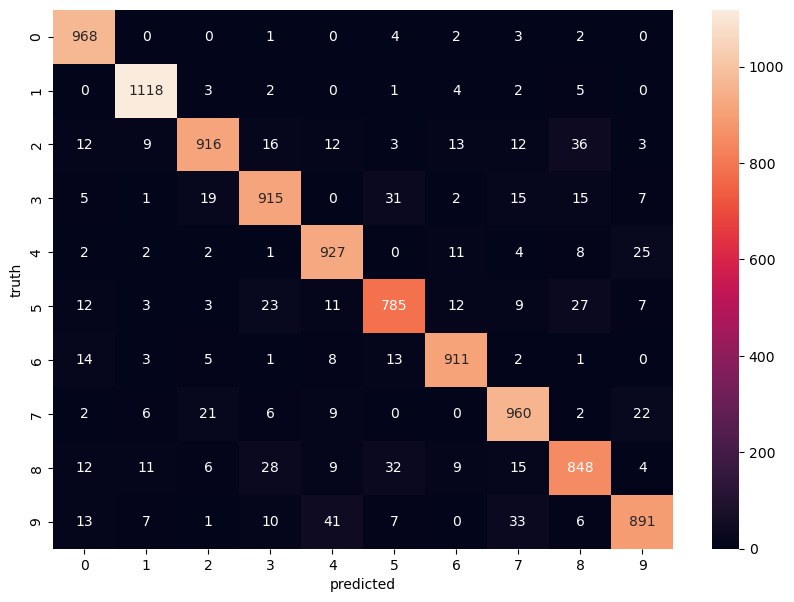

In [52]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [55]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    
])
model.compile(
optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattend,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2728 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1233 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0874 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0672 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0535 - accuracy: 0.9836


In [6]:
model.evaluate(x_test_flattend,y_test)

NameError: name 'model' is not defined

In [3]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    
])
model.compile(
    optimizer='adam',
    loss='categorical_hinge',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=5)

NameError: name 'keras' is not defined